In [1]:
# If the below code doesn't work uncomment this and run (this adds the parent directory to the path)
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np

dl = DataLib("SignalData")

In [2]:
'''
takes in indicator. Then processes return and plots bond return, indicator, and pnl
indicator is a function, returns new time series with the indicator

CURRENTLY ONLY DOING FOR USA
'''
bond_return_index = dl.pull('BondRetIdx/LocalFX')
bond_return_change = bond_return_index.resample('M').mean().pct_change()


def evaluate_performance(indicator):
    first_date = indicator.first_valid_index()
    shifted_bond_return = bond_return_change.shift(1)
    days_profit = -shifted_bond_return['USA'] * indicator
    days_profit += 1
    days_profit[first_date] = bond_return_index['USA'][first_date]
    pnl = days_profit.cumprod()
    return pnl
    
    
def plot_evaluation(indicator, pnl):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(pnl.to_timestamp(), label = 'Portfolio Returns')
    ax1.plot(bond_return_index['USA'].to_timestamp(), label = 'Bond Market Index')
    ax1.set_ylabel('Returns or Index')
    ax1.legend()
    ax2.plot(indicator.to_timestamp(), color = 'tab:red',label = 'Indicator')
    ax2.set_ylabel('Indicator')
    ax2.legend()
    plt.title('USA')
    plt.show()

I need to examine the relationship between gdp growth and bond markets. When gdp is growing, people are gonna be investing in equities and since investors usually have a finite amount of money to invest, they will usuaally shift their money away from bonds and into equities causing equity prices to fall. Additionally, interest rates will also begin to increase to prevent inflation which will also cause bonds to lose value so we should be shorting the bonds. Lastly, I need to look at the relationship of real gdp growth and nominal gdp growth to bond markets. I would imagine nominal gdp will be a bigger indicator since it is also affected by inflation but need to dig ito the data.

country     AUS  DEU     CAN  ESP      FRA  ITA  JPN     CHE      GBR      USA
date                                                                          
1980Q1   35.481  NaN  63.663  NaN  203.311  NaN  NaN  28.012  136.902  714.327
1980Q2   38.896  NaN  66.547  NaN  206.365  NaN  NaN  30.145  145.594  714.327
1980Q3   41.689  NaN  74.177  NaN  205.454  NaN  NaN  30.589  157.097  714.327
1980Q4   48.365  NaN  71.405  NaN  203.647  NaN  NaN  29.368  167.221  714.327
1981Q1   41.774  NaN  70.814  NaN  185.657  NaN  NaN  26.365  156.575  801.761


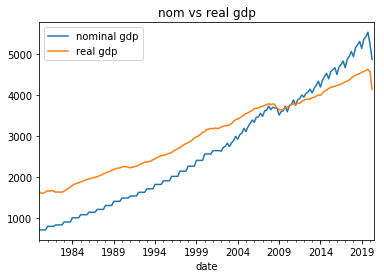

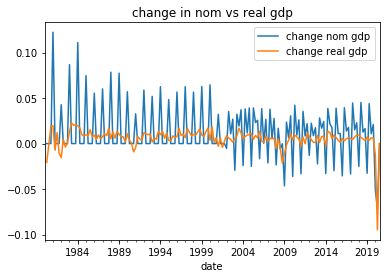

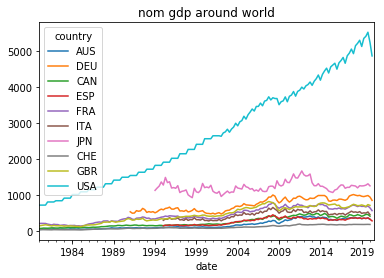

In [7]:
curve_height_indicator = pd.Series([])
gdp_nom = dl.pull('GDP/Nominal') #quarterly
gdp_real = dl.pull('GDP/Real')
change_gdp_nom = gdp_nom.pct_change()
change_gdp_real = gdp_real.pct_change()
bond_return_index = dl.pull('BondRetIdx/LocalFX')
bond_return_change = bond_return_index.resample('M').mean().pct_change()

print(gdp_nom.head())
gdp_nom['USA'].plot()
gdp_real['USA'].plot()
plt.title('nom vs real gdp')
plt.legend(['nominal gdp', 'real gdp'])
plt.show()

change_gdp_nom['USA'].plot()
change_gdp_real['USA'].plot()
plt.title('change in nom vs real gdp')
plt.legend(['change nom gdp', 'change real gdp'])
plt.show()

gdp_nom.plot()
plt.title('nom gdp around world')
plt.show()